## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, how="outer")

# # Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
mice= combined_mouse_data["Mouse ID"].value_counts()
mice_count=len(mice)
mice_count

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice)==False]

In [22]:
# Checking the number of mice in the clean DataFrame.
squeaky_mouse=clean_df["Mouse ID"].value_counts()
squeaky_number=len(squeaky_mouse)
squeaky_number

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_standard = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regimen_mean
regimen_median
regimen_variance
regimen_standard
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table= pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_standard, "SEM": regimen_sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

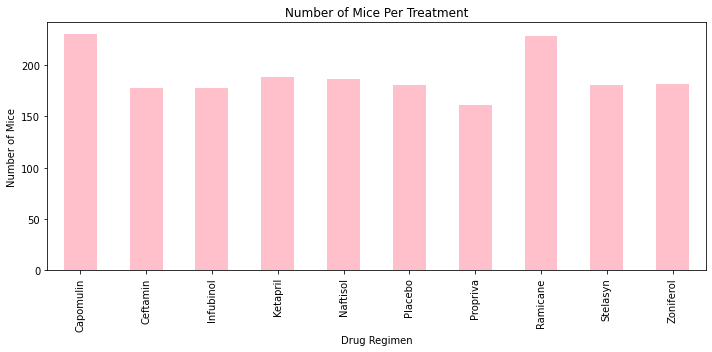

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_treatment_count= combined_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

bar_pandas= mouse_treatment_count.plot.bar(figsize=(10,5), color="pink")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")

plt.savefig("data/bar_pandas.png")
plt.tight_layout()
plt.show()

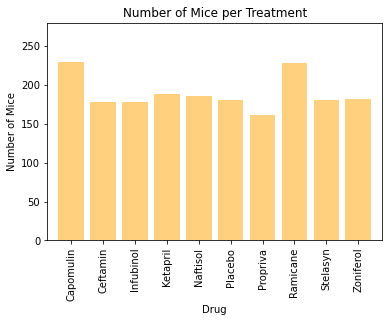

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice = (combined_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count().tolist())
mice
x_axis = np.arange(len(mouse_treatment_count))
plt.bar(x_axis, mice, color='orange', alpha=0.5, align="center")

tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice)+50)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")
plt.show()

In [27]:
# Count gender
groupby_gender= combined_mouse_data.groupby(["Mouse ID", "Sex"])
gender_df= pd.DataFrame(groupby_gender.size())

mouse_gender= pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender

,0
Sex,
Female,124
Male,125


C:\Users\ellel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


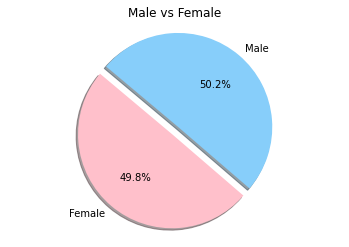

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female", "Male"]
sizes = [15,10]
colors = ["Pink","lightskyblue"]
explode = (0.1, 0)
plt.pie(mouse_gender, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female")
plt.axis("equal")
plt.show()

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
mouse_gender = [123,125]
colors = ["red","blue"]
explode = (0.1,0)

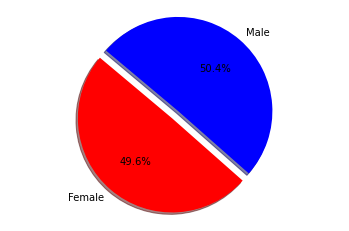

In [30]:
plt.pie(mouse_gender, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= combined_mouse_data.groupby(["Mouse ID", "Drug Regimen"]).agg(Timepoint=("Timepoint", "max"))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df= last_timepoint.merge(combined_mouse_data, how="inner", on=["Mouse ID", "Drug Regimen","Timepoint"])
last_timepoint_df

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,10,Female,12,26,48.710661,0
245,z578,Ramicane,45,Male,11,16,30.638696,0
246,z581,Infubinol,45,Female,24,25,62.754451,3
247,z795,Naftisol,45,Female,13,29,65.741070,3


In [42]:
treatment_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

vol_data = []

for regimen in treatment_list:
        
    tumorvolume = last_timepoint_df["Tumor Volume (mm3)"].loc[last_timepoint_df["Drug Regimen"] == regimen]
 
    vol_data.append(tumorvolume)
    
    quartiles = tumorvolume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"Treatment: {regimen}")
    print(f"The lower quartile Tumor Volume (mm3), for {regimen} is:{round(lowerq,3)}")
    print(f"The upper quartile Tumor Volume (mm3), for {regimen} is:{round(upperq,3)}")
    print(f"The median Tumor Volume (mm3), for {regimen} is:{round(quartiles[0.5],3)}")
    print(f"The interquartile range is: {round(iqr,3)}")
    
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    print(f"For {regimen} values below {round(lowerbound,3)} could be lower outliers")
    print(f"For {regimen} values above {round(upperbound,3)} could be upper outliers")
    
    loweroutliers= last_timepoint_df["Drug Regimen"][last_timepoint_df["Tumor Volume (mm3)"] < lowerbound].count()
    upperoutliers= last_timepoint_df["Drug Regimen"][last_timepoint_df["Tumor Volume (mm3)"] > upperbound].count()                                                                     
    outliers= loweroutliers + upperoutliers
    print(f"{outliers} posible outliers were found for {regimen}\n")

Treatment: Capomulin
The lower quartile Tumor Volume (mm3), for Capomulin is:32.377
The upper quartile Tumor Volume (mm3), for Capomulin is:40.159
The median Tumor Volume (mm3), for Capomulin is:38.125
The interquartile range is: 7.782
For Capomulin values below 20.705 could be lower outliers
For Capomulin values above 51.832 could be upper outliers
147 posible outliers were found for Capomulin

Treatment: Ramicane
The lower quartile Tumor Volume (mm3), for Ramicane is:31.56
The upper quartile Tumor Volume (mm3), for Ramicane is:40.659
The median Tumor Volume (mm3), for Ramicane is:36.562
The interquartile range is: 9.099
For Ramicane values below 17.913 could be lower outliers
For Ramicane values above 54.307 could be upper outliers
133 posible outliers were found for Ramicane

Treatment: Infubinol
The lower quartile Tumor Volume (mm3), for Infubinol is:54.049
The upper quartile Tumor Volume (mm3), for Infubinol is:65.526
The median Tumor Volume (mm3), for Infubinol is:60.165
The inte

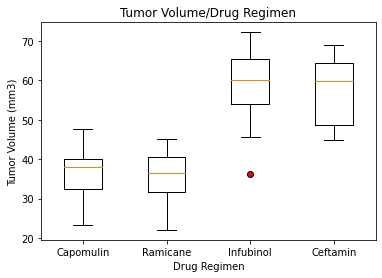

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker_color= dict(markerfacecolor="red", marker="o")
fig, ax = plt.subplots()
ax.set_title("Tumor Volume/Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(vol_data, flierprops=marker_color)
ax.set_xticklabels(treatment_list)
ax.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

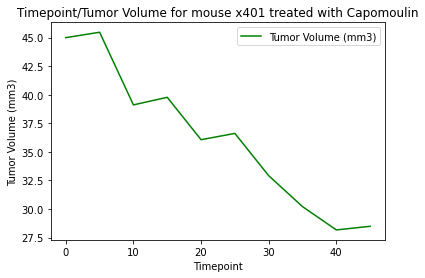

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot = clean_df.loc[(clean_df["Mouse ID"] == "x401")]
lineplot.plot(x = "Timepoint",y ="Tumor Volume (mm3)", color = "green")
plt.title("Timepoint/Tumor Volume for mouse x401 treated with Capomoulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

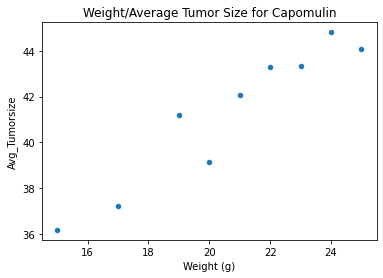

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
scatterplot = scatterplot.groupby("Weight (g)").agg(Avg_Tumorsize = ("Tumor Volume (mm3)", "mean")). reset_index()
scatterplot.plot(kind = "scatter", x = "Weight (g)", y = "Avg_Tumorsize", title = "Weight/Average Tumor Size for Capomulin")
plt.show()

## Correlation and Regression

The correlation factor for Weight and Avg_Tumorsize is 0.95


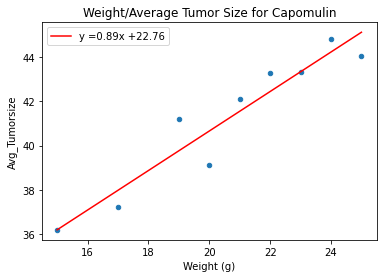

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Weight = scatterplot["Weight (g)"]
Avg_Tumorsize = scatterplot["Avg_Tumorsize"]
correlation = st.pearsonr(Weight,Avg_Tumorsize)
print(f"The correlation factor for Weight and Avg_Tumorsize is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weight, Avg_Tumorsize) 
regress_values = Weight * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str (round(intercept,2))
scatterplot.plot(kind = "scatter", x = "Weight (g)", y = "Avg_Tumorsize", title = "Weight/Average Tumor Size for Capomulin")
plt.plot(Weight, regress_values, "r-", label=line_eq)
plt.legend()
plt.show()